In [33]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
import datetime
from datetime import datetime
from __future__ import division
from functools import wraps
from pandas.stats import moments

In [34]:
#Lista wybranych do analizy spółek
stocks = ['LGF','JPM','INTC','WFC']
#Określamy przedział czasowy dla którego będziemy pobierać informacje
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)
#Importujemy dane z google finance
for stock in stocks:   
    globals()[stock] = web.DataReader(stock,'google',start,end)



In [35]:
WFC.describe() #Informacje na temat spółki Wells Fargo

,Open,High,Low,Close,Volume
count,250.000000,251.000000,250.000000,251.000000,2.510000e+02
mean,53.763760,54.187968,53.369480,53.799841,2.006277e+07
std,3.162314,3.124058,3.120124,3.114625,9.997544e+06
min,44.540000,44.760000,44.320000,44.500000,1.031746e+06
25%,52.362500,52.810000,51.927500,52.450000,1.452359e+07
50%,54.305000,54.640000,53.925000,54.330000,1.738446e+07
75%,55.557500,56.005000,55.197500,55.585000,2.273253e+07
max,59.780000,59.990000,59.090000,59.730000,1.009888e+08


In [36]:
WFC.info() #DataFrame(W dalszych krokach będziemy korzystać z zawartych w nim informacji)                         

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-10-14 to 2017-10-12
Data columns (total 5 columns):
Open      250 non-null float64
High      251 non-null float64
Low       250 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [37]:
symbols = get_nasdaq_symbols()#Pobieramy dodatkowe informacje na temat spółek z giełdy NASDAQ
print(symbols.loc['IBM'])#Drukujemy informacje na temat IBM

Nasdaq Traded                                                    True
Security Name       International Business Machines Corporation Co...
Listing Exchange                                                    N
Market Category                                                      
ETF                                                             False
Round Lot Size                                                    100
Test Issue                                                      False
Financial Status                                                  NaN
CQS Symbol                                                        IBM
NASDAQ Symbol                                                     IBM
NextShares                                                      False
Name: IBM, dtype: object


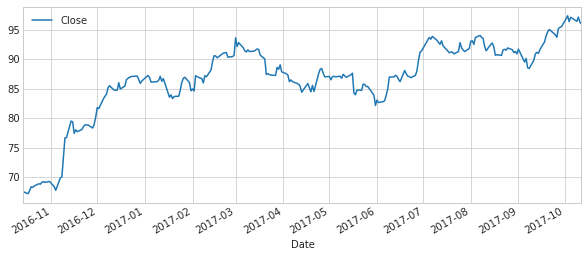

In [38]:
#Generujemy chart pokazujący średnie ceny zamknięcia na określonym wcześniej interwale czasowym(dla JPM)
JPM['Close'].plot(legend=True,figsize=(10,4)) 

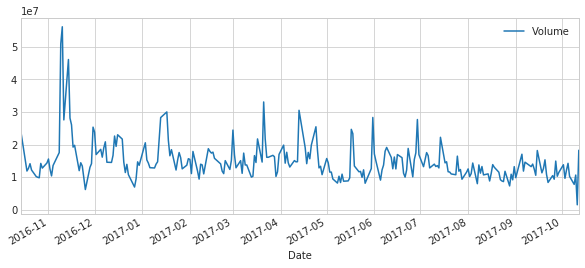

In [39]:
#Wykres wolumenowy(JPM:JP MORGAN)
JPM['Volume'].plot(legend=True,figsize=(10,4))

In [40]:
ma_day = [10,20,40]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    JPM[column_name]=JPM['Close'].rolling(ma).mean()

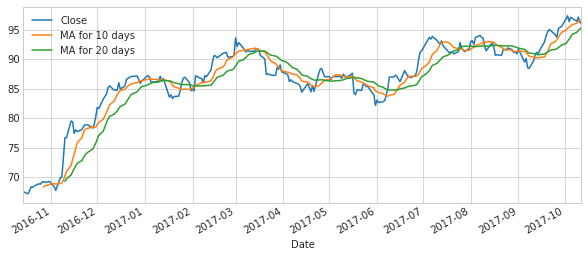

In [41]:
JPM[['Close','MA for 10 days','MA for 20 days']].plot(subplots=False,figsize=(10,4))

In [ ]:
JPM['Daily Return'] = JPM['Close'].pct_change()
JPM['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

In [ ]:
sns.distplot(JPM['Daily Return'].dropna(),bins=100,color='indianred')

In [ ]:
closing_df = web.DataReader(['LGF','JPM','INTC','WFC'],'google',start,end)['Close']


In [ ]:
closing_df.head()

In [ ]:
tech_rets = closing_df.pct_change()

In [ ]:
sns.jointplot('WFC','JPM',tech_rets,kind='scatter')

In [ ]:
sns.pairplot(tech_rets.dropna())

In [ ]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [ ]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

In [ ]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# label
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


In [ ]:
sns.distplot(JPM['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
rets['JPM'].quantile(0.05)